In [39]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver = 'lbfgs', multi_class='ovr')

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Cross-validation scores: [0.86666667 0.96666667 0.93333333 0.93333333 1.        ]
Average cross-validation score: 0.940


In [40]:
# KFold
from sklearn.model_selection import KFold

for n in [3, 5, 7]:
    kfold = KFold(n_splits=n)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print("*****************n_splits = [{}]*****************\n".format(n))
    print("Cross-validation scores:\n{}".format(scores))
    print("Average: {:.2f}\n".format(scores.mean()))

*****************n_splits = [3]*****************

Cross-validation scores:
[0. 0. 0.]
Average: 0.00

*****************n_splits = [5]*****************

Cross-validation scores:
[1.         0.9        0.5        0.93333333 0.63333333]
Average: 0.79

*****************n_splits = [7]*****************

Cross-validation scores:
[1.         1.         0.81818182 0.52380952 0.95238095 0.80952381
 0.85714286]
Average: 0.85



In [41]:
# Stratify KFold
from sklearn.model_selection import KFold

for n in [3, 5, 7]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print("*****************n_splits = [{}]*****************\n".format(n))
    print("Cross-validation scores:\n{}".format(scores))
    print("Average: {:.2f}\n".format(scores.mean()))

*****************n_splits = [3]*****************

Cross-validation scores:
[0.96 0.86 0.96]
Average: 0.93

*****************n_splits = [5]*****************

Cross-validation scores:
[0.96666667 0.83333333 0.93333333 1.         0.93333333]
Average: 0.93

*****************n_splits = [7]*****************

Cross-validation scores:
[0.95454545 0.95454545 0.77272727 0.95238095 1.         1.
 0.9047619 ]
Average: 0.93



In [42]:
# Leave One Out
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: {}".format(len(scores)))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations: 150
Mean accuracy: 0.94


In [43]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Number of cv iterations: {}".format(len(scores)))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations: 10
Mean accuracy: 0.91


In [44]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold

logreg = LogisticRegression()
X, y = make_blobs(n_samples=12, random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.8        0.66666667]


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tinhtn/anaconda3/env

In [45]:
# Grid search
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}  size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112  size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [46]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}  size of test set: {}".format(X_trainval.shape[0], X_test.shape[0]))

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {}  size of valid set: {}".format(X_train.shape[0], X_valid.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
score = svm.score(X_test, y_test)
print("Test set score with best parameters: {:.2f}".format(score))

Size of training set: 112  size of test set: 38
Size of training set: 84  size of valid set: 28
Best score: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [47]:
import numpy as np
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
#         svm.fit(X_train, y_train)
#         score = svm.score(X_valid, y_valid)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
score = svm.score(X_test, y_test)
print("Test set score with best parameters: {:.2f}".format(score))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


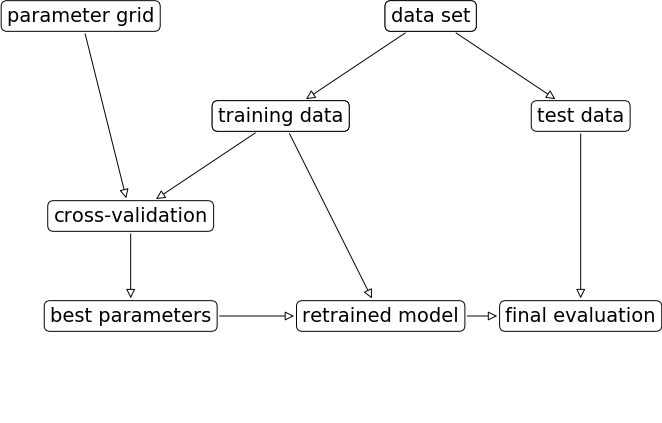

In [48]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [49]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [50]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: \n{}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: 
{'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000537,0.000053,0.000283,0.000095,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000417,0.000018,0.000184,0.000010,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000382,0.000003,0.000168,0.000001,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000392,0.000015,0.000196,0.000034,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000395,0.000009,0.000189,0.000014,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


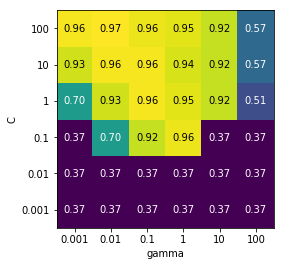

In [52]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C',
                      yticklabels=param_grid['C'], cmap="viridis")

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


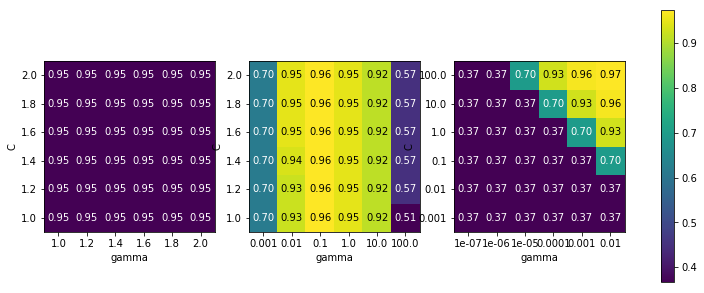

In [53]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C':np.linspace(1, 2, 6), 'gamma':np.linspace(1, 2, 6)}

param_grid_one_log = {'C':np.linspace(1, 2, 6), 'gamma':np.logspace(-3, 2, 6)}

param_grid_range = {'C':np.logspace(-3, 2, 6), 'gamma':np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    sroces = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    sroces_image = mglearn.tools.heatmap(sroces, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(sroces_image, ax=axes.tolist())

In [54]:
param_grid = [{'kernel': ['rbf'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100],
               'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwa

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0005795,0.000388527,0.000446939,0.000449848,0.000408411,0.000472212,0.000431776,0.00042448,0.000394964,0.000392151,...,0.000251007,0.000333452,0.00049324,0.000541496,0.000352383,0.000311899,0.000276756,0.000299263,0.000270462,0.000272942
std_fit_time,0.000228954,4.27189e-06,9.00944e-05,2.38134e-05,8.42397e-06,5.12749e-05,1.27584e-05,2.65768e-05,2.58374e-06,6.00777e-06,...,1.30904e-05,1.79854e-05,2.46781e-05,1.40042e-05,6.03157e-06,4.72622e-06,7.00707e-06,5.52764e-05,1.59656e-05,2.59491e-05
mean_score_time,0.000272799,0.00017333,0.000188494,0.000198364,0.000173187,0.000207186,0.000198698,0.000175905,0.000173569,0.000172329,...,0.0001544,0.000169706,0.000178766,0.000195408,0.000166798,0.000162125,0.000158787,0.000156593,0.00015564,0.000155687
std_score_time,0.000101824,1.55978e-06,2.48654e-05,2.38137e-05,2.55275e-06,2.42067e-05,1.8375e-05,6.95986e-06,7.23159e-07,1.20065e-06,...,4.38483e-06,1.16921e-05,7.18016e-06,6.21829e-06,3.40062e-06,6.95431e-06,9.34041e-06,9.15403e-06,8.97594e-06,1.2642e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


In [56]:
# Net cross-validation
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross validation: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))

Cross validation: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.98


In [57]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
                
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        
    return np.array(outer_scores)

In [58]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5),
                   SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [59]:
# Imbalance datasets
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier

digits = load_digits()
# print(digits['DESCR'])
y = digits.target == 9
print("bincount {}".format(np.bincount(y)))

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predict labels:{}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

bincount [1617  180]
Unique predict labels:[False]
Test score: 0.90


In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Unique predict labels:{}".format(np.unique(pred_tree)))
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Unique predict labels:[False  True]
Test score: 0.92


In [61]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.81
logreg score: 0.98


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
[[401   2]
 [  8  39]]


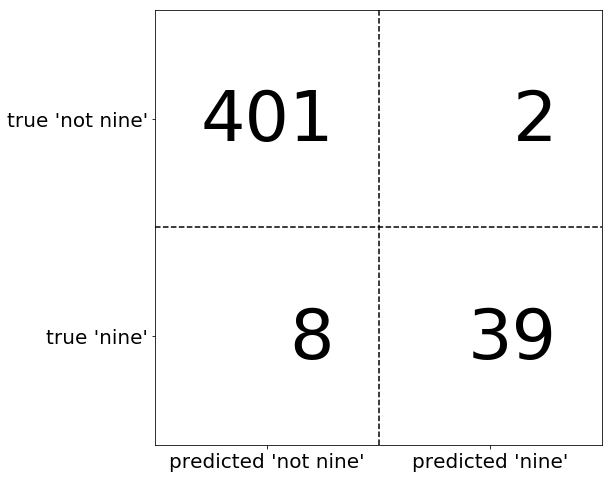

In [62]:
# Confusion matrices
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))
mglearn.plots.plot_confusion_matrix_illustration()

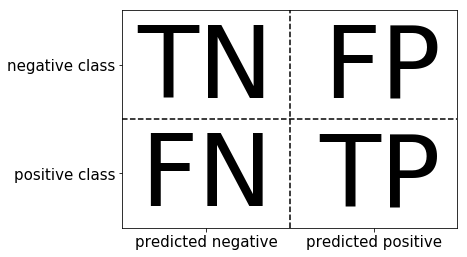

In [63]:
mglearn.plots.plot_binary_confusion_matrix()

In [64]:
print("Most frequent class: ")
print(confusion_matrix(y_test, pred_most_frequent))
print("Dummy model: ")
print(confusion_matrix(y_test, pred_dummy))
print("Decision tree: ")
print(confusion_matrix(y_test, pred_tree))
print("Logistic Regression: ")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class: 
[[403   0]
 [ 47   0]]
Dummy model: 
[[350  53]
 [ 36  11]]
Decision tree: 
[[390  13]
 [ 24  23]]
Logistic Regression: 
[[401   2]
 [  8  39]]


In [65]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logreg: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.20
f1 score tree: 0.55
f1 score logreg: 0.89


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

   micro avg       0.92      0.92      0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


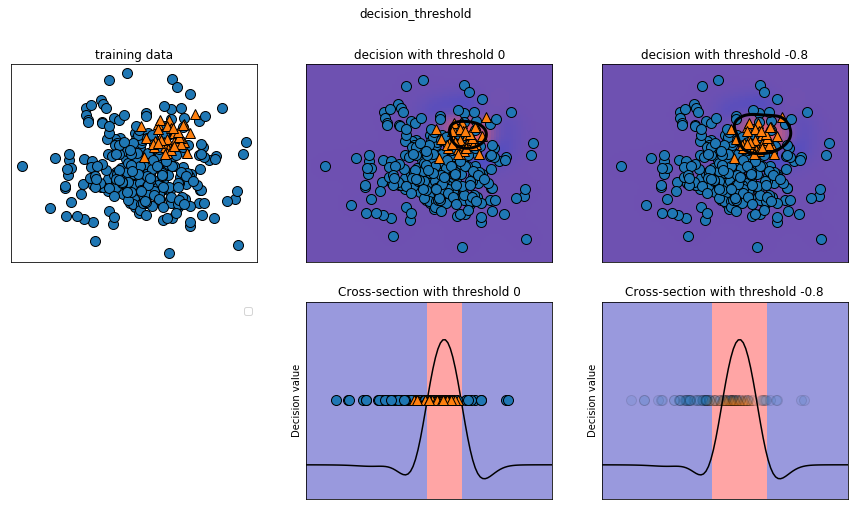

In [67]:
# Taking uncertainty into account
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
mglearn.plots.plot_decision_threshold()

In [68]:
print(classification_report(y_test, svc.predict(X_test)))
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [69]:
# Precision-recall curves and ROC curves
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
print("Precision: \n{}".format(precision))
print("Recall: \n{}".format(recall))
print("Thresholds: \n{}".format(thresholds))

Precision: 
[0.32142857 0.2962963  0.30769231 0.32       0.33333333 0.34782609
 0.36363636 0.38095238 0.4        0.36842105 0.33333333 0.35294118
 0.375      0.4        0.42857143 0.38461538 0.41666667 0.45454545
 0.4        0.44444444 0.5        0.57142857 0.66666667 0.6
 0.5        0.66666667 0.5        1.         1.        ]
Recall: 
[1.         0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 0.77777778 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.55555556 0.55555556 0.55555556
 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444 0.33333333
 0.22222222 0.22222222 0.11111111 0.11111111 0.        ]
Thresholds: 
[-0.7512563  -0.58749402 -0.48739733 -0.44364565 -0.40435353 -0.28965335
 -0.24173165 -0.19257469 -0.17852475 -0.16644845 -0.1601932   0.08620484
  0.14630375  0.19153373  0.36988055  0.52008479  0.5230006   0.53195462
  0.63212214  0.74430046  0.87212596  0.88002558  0.88395198  0.97789353
  1.00010384  1.07030762  1.084

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


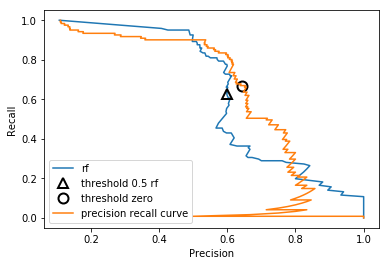

In [71]:
from sklearn.ensemble import RandomForestClassifier
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision_rf, recall_rf, label='rf')
close_zero_rf = np.argmin(np.abs(thresholds_rf - .5))
plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '^', markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')


In [72]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

f1_score of random forest: 0.610
f1_score of svc: 0.656
Average precision of random forest: 0.660
Average precision of svc: 0.666


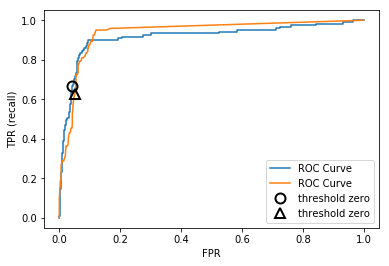

In [79]:
# Receiver operating characteristics (ROC) and AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
close_zero_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(fpr_rf[close_zero_rf], tpr_rf[close_zero_rf], '^', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [82]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


(-0.01, 1.02)

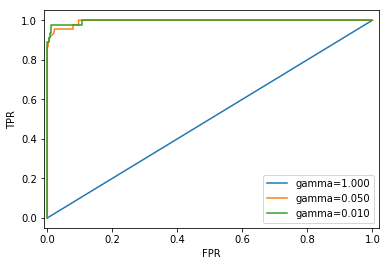

In [91]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, stratify=y, random_state=0)

plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='best')
plt.xlim(-0.01, 1)
plt.xlim(-0.01, 1.02)

/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      

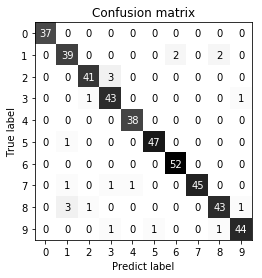

In [95]:
# Metrics for Multiclass Classification
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predict label',
                                     ylabel='True label', xticklabels=digits.target_names,
                                     yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
print(classification_report(y_test, pred))

In [97]:
print("Micro average f1 score: {:.3}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954
